# [7,4]码的流形分布

[7,4]码的前四列皆为单位阵，因此仅需考虑后三列即可,共12个元素

In [1]:
# enumerate all elements
from itertools import combinations
import numpy as np

def combine(temp_list, n):
    result = []
    for c in combinations(temp_list, n):
        result.append(c)
    return result

num_elements = np.arange(12)
comb = []
for i in range(len(num_elements)):
    comb.extend(combine(num_elements, i))
comb[0] = tuple(np.arange(12))

In [2]:
all_codes = np.zeros([len(comb), 12], dtype=np.int8)

for i in range(len(comb)):
    all_codes[i, list(comb[i])] = 1
all_codes_distance = np.zeros(len(comb)).astype(np.int8)

for i in range(len(all_codes)):
    G_matrix = np.concatenate([np.eye(4), all_codes[i].reshape(4,3)], axis=1).astype(np.int8)
    linear_code = LinearCode(Matrix(GF(2), G_matrix))
    all_codes_distance[i] = linear_code.minimum_distance()

In [3]:
!pip install -i https://pypi.douban.com/simple sklearn

from sklearn import manifold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Looking in indexes: https://pypi.douban.com/simple
    100% |████████████████████████████████| 6.8MB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 307kB 1.6MB/s ta 0:00:01
  Running setup.py install for sklearn ... done


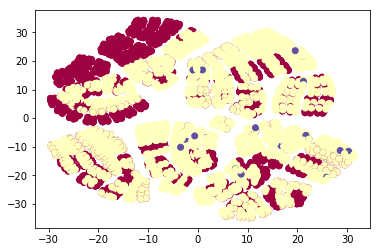

In [27]:
tsne = manifold.TSNE(n_components=2)
X = tsne.fit_transform(all_codes)

plt.scatter(X[:, 0], X[:, 1], c=all_codes_distance.reshape(4095,), cmap=plt.cm.Spectral, label=all_codes_distance.reshape(4095,))

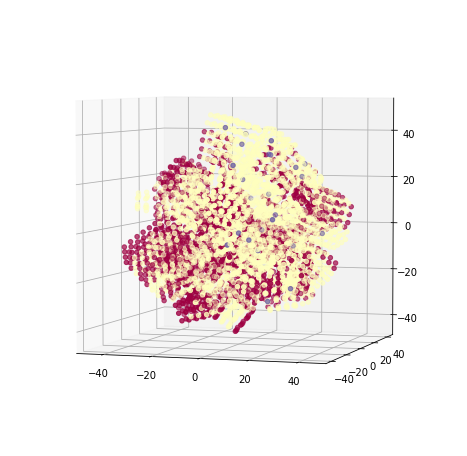

In [26]:
tsne = manifold.TSNE(n_components=3)
X = tsne.fit_transform(all_codes)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=all_codes_distance.reshape(4095,), cmap=plt.cm.Spectral, label=all_codes_distance.reshape(4095,))
ax.view_init(4, -72)  # 初始化视角